In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. extract the csv file

In [89]:
df = pd.read_csv("student_subscriptions.csv")
df.head()

,SessionName,TrackName,Hackerspace,Country,GroupName,ProductSchedule,Student,StudentGender,InstructorFullName,InstructorEmail,SubscriptionStartDate,SubscriptionEndDate,SubscriptionProgress,SubscriptionHasDiploma,DiplomaDate,instructor_diploma,StudentBirthDate,professionalExperience,Industry
0,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,hiba elartachy,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2/11/2024,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2003-07-25,0,Sales
1,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Salma Nour,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2/11/2024,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2001-03-15,1,Research And Development
2,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Nada Wafdi,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2/11/2024,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,2000-06-19,0,Research And Development
3,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,YOUSSOUPHA SEYE,Unknown,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,0.00%,False,NaN,NaN,NaN,0,Marketing
4,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,Ibrahimo Gakou,Male,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,26.61%,False,NaN,NaN,1997-06-04,3,Design


# 2. clean the data

### 2.1 handle missing values

In [93]:
df.isnull().sum()

SessionName                  0
TrackName                    0
Hackerspace                  0
Country                      0
GroupName                    0
ProductSchedule              0
Student                      0
StudentGender                0
InstructorFullName           0
InstructorEmail              0
SubscriptionStartDate        0
SubscriptionEndDate          0
SubscriptionProgress         0
SubscriptionHasDiploma       0
DiplomaDate               1143
instructor_diploma        1143
StudentBirthDate            46
professionalExperience       0
Industry                     0
dtype: int64

In [95]:
df.drop_duplicates(inplace=True)

In [97]:
df.groupby('InstructorFullName')['Student'].count().reset_index(name='Nombre_Etudiants').sort_values(by='Nombre_Etudiants', ascending=False)

,InstructorFullName,Nombre_Etudiants
320,Montassar Sallami,60
213,Jacob Ojumu,46
452,Soumeya LARDJAM,46
355,OJIAKU DANIEL ARINZE NA FT,44
184,Husseini Mudi,41
...,...,...
475,Wiem Souai,1
49,Akila abdellaoui,1
277,Mario Shady,1
495,Yousssef Saki,1


In [99]:
df['InstructorFullName'].value_counts()

InstructorFullName
Montassar Sallami              60
Jacob Ojumu                    46
Soumeya LARDJAM                46
OJIAKU DANIEL  ARINZE NA FT    44
EYA WESLATI                    41
                               ..
 Nadia  TRIKI                   1
Fares Gassoumi                  1
Achile   Ahikpe                 1
Alàa Chiba                      1
Ramy El Garmattou               1
Name: count, Length: 532, dtype: int64

In [101]:
df['instructor_diploma'] = df.groupby('InstructorFullName')['instructor_diploma'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


C:\Users\insaf\AppData\Local\Temp\ipykernel_18668\2678054666.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['instructor_diploma'] = df.groupby('InstructorFullName')['instructor_diploma'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\insaf\AppData\Local\Temp\ipykernel_18668\2678054666.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['instructor_diploma'] = df.groupby('InstructorFullName')['instructor_diploma'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [102]:
df.isnull().sum()

SessionName                  0
TrackName                    0
Hackerspace                  0
Country                      0
GroupName                    0
ProductSchedule              0
Student                      0
StudentGender                0
InstructorFullName           0
InstructorEmail              0
SubscriptionStartDate        0
SubscriptionEndDate          0
SubscriptionProgress         0
SubscriptionHasDiploma       0
DiplomaDate               1143
instructor_diploma         191
StudentBirthDate            46
professionalExperience       0
Industry                     0
dtype: int64

In [105]:
missing_diploma_instructors = df[df['instructor_diploma'].isnull()]['InstructorFullName'].unique()
missing_diploma_instructors

array(['MOHAMED OSAMA ELSHAMY', 'Montassar  Sallami', 'Fares Gassoumi',
       'Nada Walid', 'Kouao Luc-Emmanuel   Randall ATTOUBE',
       'BOUREGAA  Mohamed', 'Mario Shady', 'Sarah Negm', 'Nadia TRIKI FT',
       'KOUAKOU CYRILLE  CARMEL KOFFI', 'Jean Marc Lebe', 'ons hafaiedh',
       'Mouhammadou Oury Diallo', 'Imad Mahjoubi', 'Abdelhalim Lemhamdi',
       'Cédric \t\t Yapi', 'Mohanad Talat ', 'Mohamed  Saad',
       'Philippe André  ASSA', 'Rostom  Mathlouthi', 'Youssef Ibrahim',
       'Ahmad  Moustafa', 'Ousseynou NDIAYE', 'Ziad  Badwy',
       'Youssef  Belhaj', 'Mohamed Mahmoud Ali', ' Mohamed  Hammammi ',
       'Imen  Haddad', 'Firas Toumi', 'Landry Mathanel  BOUE',
       'Youssef Galal', 'Mangoua JEAN MERMOZ EFFI',
       'Mohamed Firas BenRomdhane ', 'Ahoueneon Gohou', 'KRAKOU KRAKOU',
       'Ramy El Garmattou', 'Achile   Ahikpe', 'Giovanni Kouessi',
       'Samba  Seck SA', 'Enock  koffi IC', 'Mouhamadou Ba',
       'Koné Konan Yann Amani', ' Kassi Jean  Wilfried Edouko

In [107]:
df['instructor_diploma'] = df['instructor_diploma'].fillna("Unknown")

In [109]:
df.isnull().sum()

SessionName                  0
TrackName                    0
Hackerspace                  0
Country                      0
GroupName                    0
ProductSchedule              0
Student                      0
StudentGender                0
InstructorFullName           0
InstructorEmail              0
SubscriptionStartDate        0
SubscriptionEndDate          0
SubscriptionProgress         0
SubscriptionHasDiploma       0
DiplomaDate               1143
instructor_diploma           0
StudentBirthDate            46
professionalExperience       0
Industry                     0
dtype: int64

In [111]:
df['StudentBirthDate'] = pd.to_datetime(df['StudentBirthDate'], errors='coerce')

### create new column age :

In [114]:
today = pd.Timestamp('today')
df['Age'] = ((today - df['StudentBirthDate']).dt.days // 365)

### replace missing ages with the median :

In [117]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

### delete studentbirthdate because age is enough for OLAP

In [120]:
df = df.drop(columns=['StudentBirthDate'])


### create new column diplomaStatus :

In [128]:
df['DiplomaStatus'] = df['DiplomaDate'].apply(lambda x: 'Yes' if pd.notnull(x) else 'No')

In [125]:
df.isnull().sum()

SessionName                  0
TrackName                    0
Hackerspace                  0
Country                      0
GroupName                    0
ProductSchedule              0
Student                      0
StudentGender                0
InstructorFullName           0
InstructorEmail              0
SubscriptionStartDate        0
SubscriptionEndDate          0
SubscriptionProgress         0
SubscriptionHasDiploma       0
DiplomaDate               1143
instructor_diploma           0
professionalExperience       0
Industry                     0
Age                          0
DiplomaStatus                0
dtype: int64

In [133]:
df

,SessionName,TrackName,Hackerspace,Country,GroupName,ProductSchedule,Student,StudentGender,InstructorFullName,InstructorEmail,SubscriptionStartDate,SubscriptionEndDate,SubscriptionProgress,SubscriptionHasDiploma,DiplomaDate,instructor_diploma,professionalExperience,Industry,Age,DiplomaStatus
0,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,hiba elartachy,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2/11/2024,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,0,Sales,21.0,Yes
1,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Salma Nour,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2/11/2024,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,1,Research And Development,24.0,Yes
2,November,Digital Marketing: Social Media Management - FR,Marrakech Hackerspace,Morocco,Hemkesh's Necromancers,P2,Nada Wafdi,Female,Imane Bouchoucha,amineimane986@gmail.com,2024-01-10,2024-01-22,100.00%,True,2/11/2024,1d90bff1-dbe6-442c-8bfc-2f1b1edd1859,0,Research And Development,25.0,Yes
3,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,YOUSSOUPHA SEYE,Unknown,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,0.00%,False,NaN,5bf0d141-3820-4596-b634-839e8155094a,0,Marketing,23.0,No
4,January,Software Developer Bootcamp*,Senegal Online Hackerspace,Senegal,Dutch White Troops,Night,Ibrahimo Gakou,Male,Assane Ndiaye PT,yahassane.king@gmail.com,2024-02-10,2024-02-10,26.61%,False,NaN,5bf0d141-3820-4596-b634-839e8155094a,3,Design,28.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019,August,Web Development Essentials*,Algiers Hackerspace,Algeria,Willow Grove Gryphons,W1,Aya Mentfakh,Female,Abderraouf Abla,abderraoufahmedabla@gmail.com,2024-08-09,2024-10-26,95.00%,True,10/25/2024,66eeb821-1d55-42fa-9707-76b585707aaa,0,Sales,19.0,Yes
5020,August,Web Development Essentials*,Algiers Hackerspace,Algeria,Willow Grove Gryphons,W1,dina djaidja,Female,Abderraouf Abla,abderraoufahmedabla@gmail.com,2024-08-09,2024-10-26,100.00%,True,2024-10-25,66eeb821-1d55-42fa-9707-76b585707aaa,0,Sales,0.0,Yes
5021,August,Python Essentials*,Algiers Hackerspace,Algeria,Bhalanetra's Marauders,W2,Lyes mokrane Djaoui,Male,Soumeya LARDJAM,lardjam8@gmail.com,2024-08-09,2024-10-26,97.01%,True,2024-10-25,47f7154a-110d-4cc3-8b7c-85b7115c982d,0,Engineering And Technology,18.0,Yes
5022,August,Python Essentials*,Algiers Hackerspace,Algeria,Bhalanetra's Marauders,W2,Zakaria Bedja,Male,Soumeya LARDJAM,lardjam8@gmail.com,2024-08-09,2024-10-26,100.00%,True,2024-10-25,47f7154a-110d-4cc3-8b7c-85b7115c982d,0,Engineering And Technology,20.0,Yes


### 2.2 standardisation 

In [138]:
df['Country'] = df['Country'].str.strip().str.title()
df['TrackName'] = df['TrackName'].str.strip().str.title()
df['Hackerspace'] = df['Hackerspace'].str.strip().str.title()
df['GroupName'] = df['GroupName'].str.strip()
df['StudentGender'] = df['StudentGender'].fillna("Unknown").str.strip().str.capitalize()
df['InstructorFullName'] = df['InstructorFullName'].str.strip().str.title()
df['Industry'] = df['Industry'].str.strip().str.title()

In [148]:
df['SubscriptionProgress'] = df['SubscriptionProgress'].str.replace('%', '').astype(float)


# 3.Convert data from OLTP to OLAP

### create new column IsChurned

In [300]:
df['IsChurned'] = df.apply(
    lambda row: 'Yes' if (
        row['SubscriptionHasDiploma'] == False or (
            row['SubscriptionProgress'] < 90 or
            row['SubscriptionEndDate'] == row['SubscriptionStartDate']
        )
    ) else 'No',
    axis=1
)



In [301]:
df['SubscriptionHasDiploma'] = df['SubscriptionHasDiploma'].apply(lambda x: 'Yes' if x else 'No')
df['DiplomaStatus'] = df['DiplomaStatus'].apply(lambda x: 'Yes' if x else 'No')


### create new column DiplomaMonth

In [305]:
df['DiplomaDate'] = pd.to_datetime(df['DiplomaDate'], errors='coerce')

df['DiplomaMonth'] = df['DiplomaDate'].dt.to_period('M')

### create new column StartMonth

In [308]:
df['SubscriptionStartDate'] = pd.to_datetime(df['SubscriptionStartDate'], errors='coerce')

df['StartMonth'] = df['SubscriptionStartDate'].dt.to_period('M')



In [310]:
df.dtypes

SessionName                       object
TrackName                         object
Hackerspace                       object
Country                           object
GroupName                         object
ProductSchedule                   object
Student                           object
StudentGender                     object
InstructorFullName                object
InstructorEmail                   object
SubscriptionStartDate     datetime64[ns]
SubscriptionEndDate               object
SubscriptionProgress             float64
SubscriptionHasDiploma            object
DiplomaDate               datetime64[ns]
instructor_diploma                object
professionalExperience             int64
Industry                          object
Age                              float64
DiplomaStatus                     object
IsChurned                         object
DiplomaMonth                   period[M]
StartMonth                     period[M]
dtype: object

### 3.1 Subscription trend analysis

In [326]:
# Créer une colonne mois d’abonnement
df['StartMonth'] = df['SubscriptionStartDate'].dt.to_period('M')

# Compter le nombre d'abonnements par mois
subscription_trend = df.groupby('StartMonth').size().reset_index(name='Subscriptions')
subscription_trend.head()

,StartMonth,Subscriptions
0,2024-01,859
1,2024-02,142
2,2024-03,741
3,2024-04,529
4,2024-05,521


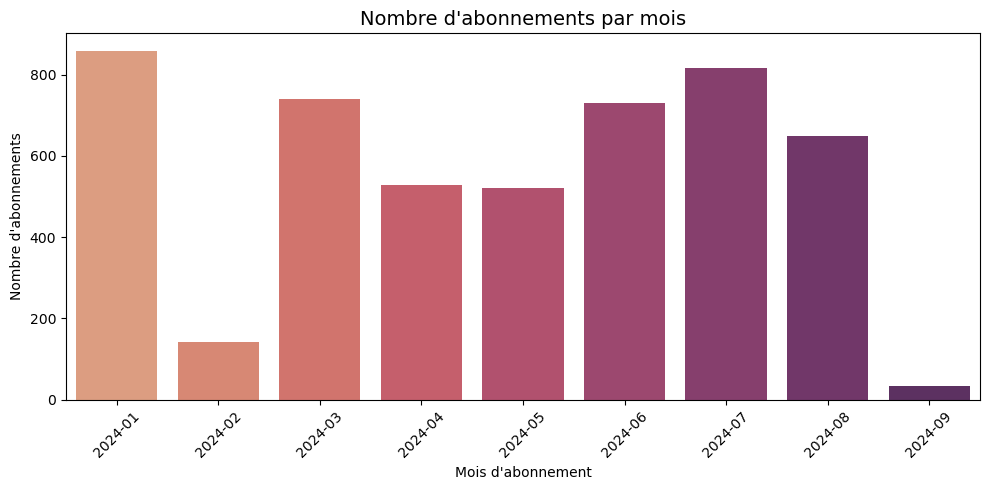

In [313]:
plt.figure(figsize=(10, 5))
sns.barplot(data=subscription_trend, x='StartMonth', y='Subscriptions', hue='StartMonth', palette='flare', legend=False)

plt.title("Nombre d'abonnements par mois", fontsize=14)
plt.xlabel("Mois d'abonnement")
plt.ylabel("Nombre d'abonnements")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [314]:
df['IsChurned'].value_counts()


IsChurned
No     4087
Yes     936
Name: count, dtype: int64

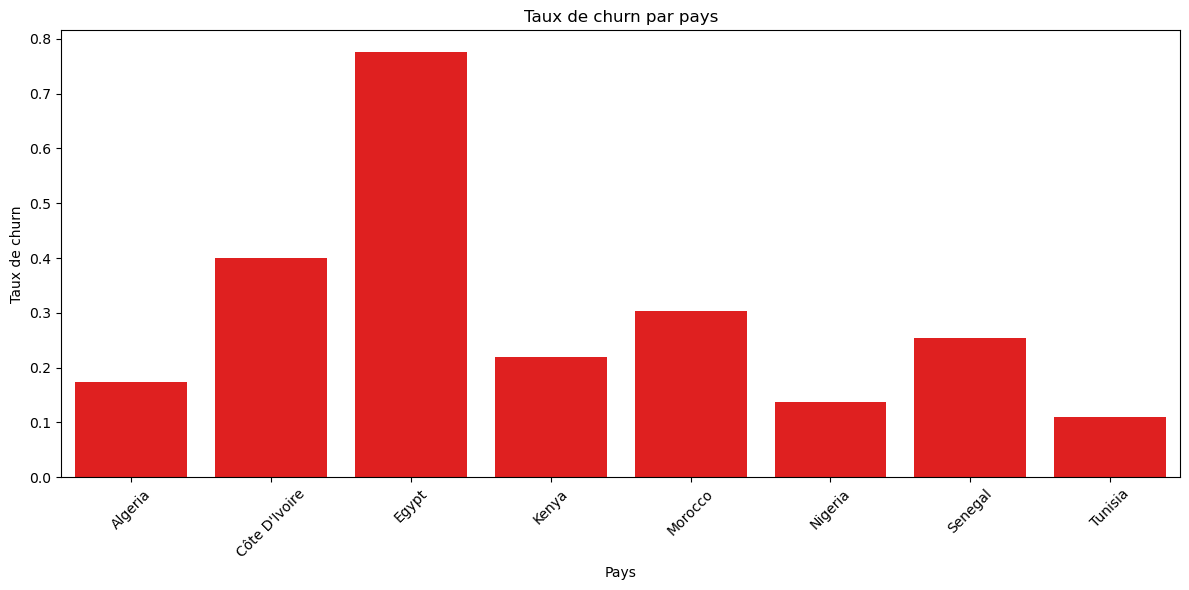

In [315]:
churn_by_country = df.groupby('Country')['IsChurned'].value_counts(normalize=True).unstack().fillna(0).reset_index()
churn_by_country.columns.name = None

plt.figure(figsize=(12, 6))
sns.barplot(data=churn_by_country, x='Country', y='Yes', color='red')
plt.xticks(rotation=45)
plt.title("Taux de churn par pays")
plt.ylabel("Taux de churn")
plt.xlabel("Pays")
plt.tight_layout()
plt.show()


C:\Users\insaf\AppData\Local\Temp\ipykernel_18668\875042201.py:16: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\insaf\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


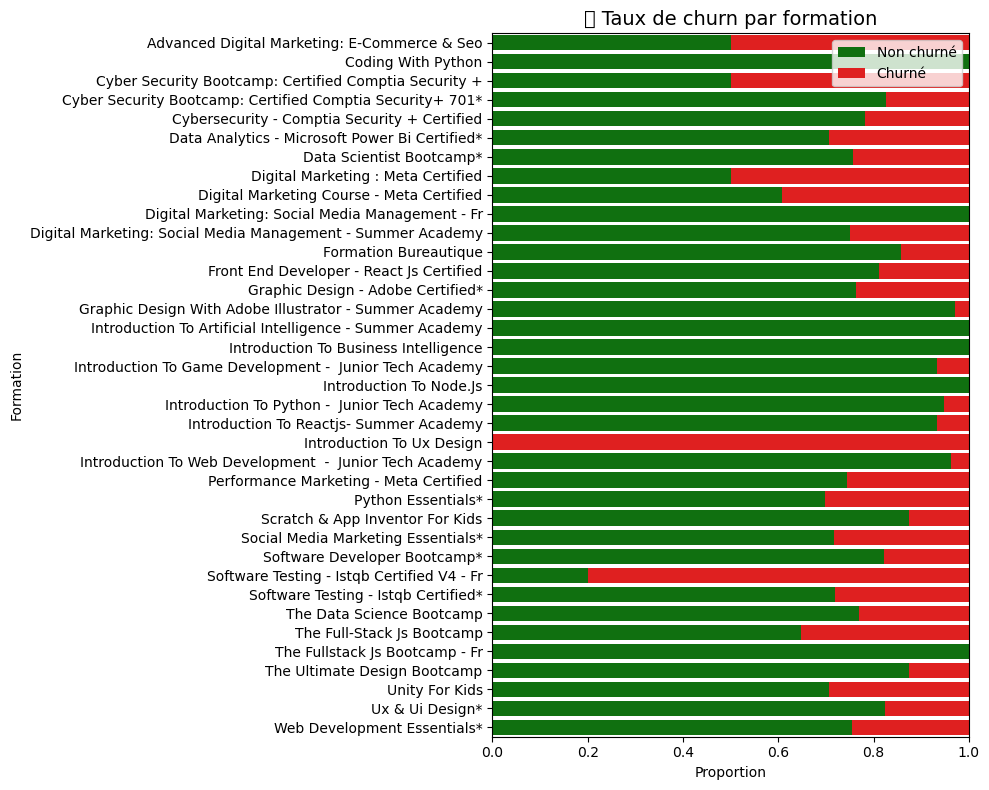

In [322]:
churn_by_track = df.groupby('TrackName')['IsChurned'].value_counts(normalize=True).unstack().fillna(0).reset_index()

plt.figure(figsize=(10, 8))

# Barres pour les non-churnés
sns.barplot(data=churn_by_track, y='TrackName', x='No', color='green', label='Non churné')

# Barres pour les churnés (empilées à droite des non-churnés)
if 'Yes' in churn_by_track.columns:
    sns.barplot(data=churn_by_track, y='TrackName', x='Yes', left=churn_by_track['No'], color='red', label='Churné')

plt.title("🎓 Taux de churn par formation", fontsize=14)
plt.xlabel("Proportion")
plt.ylabel("Formation")
plt.legend()
plt.tight_layout()
plt.show()


# 4. Cohort analysis

In [324]:
# Création de la table de cohorte
cohort = df.groupby(['StartMonth', 'Country', 'TrackName']).agg({
    'Student': 'count',
    'SubscriptionHasDiploma': lambda x: (x == True).mean(),
    'SubscriptionProgress': 'mean',
    'IsChurned': lambda x: (x == 'Yes').mean()
}).reset_index()

# Renommer les colonnes
cohort.rename(columns={
    'Student': 'TotalStudents',
    'SubscriptionHasDiploma': 'DiplomaRate',
    'SubscriptionProgress': 'AvgProgress',
    'IsChurned': 'ChurnRate'
}, inplace=True)

cohort.head()


,StartMonth,Country,TrackName,TotalStudents,DiplomaRate,AvgProgress,ChurnRate
0,2024-01,Côte D'Ivoire,Data Scientist Bootcamp*,3,0.0,94.693333,0.333333
1,2024-01,Côte D'Ivoire,Performance Marketing - Meta Certified,11,0.0,90.729091,0.181818
2,2024-01,Côte D'Ivoire,Python Essentials*,9,0.0,64.871111,0.444444
3,2024-01,Côte D'Ivoire,Social Media Marketing Essentials*,6,0.0,83.988333,0.333333
4,2024-01,Côte D'Ivoire,Software Developer Bootcamp*,9,0.0,87.752222,0.222222


# 5. Load

In [332]:
df.to_csv("student_subscriptions_olap.csv", index=False)
subscription_trend.to_csv("subscription_trend.csv", index=False)
churn_by_country.to_csv("churn_by_country.csv", index=False)
churn_by_track.to_csv("churn_by_track.csv", index=False)
cohort.to_csv("cohort_analysis.csv", index=False)